# Project - Spam Email Detection

# Project Description:

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

# Problem Statement:

1. Detect Spam emails

# Dataset Details:

- Dataset Characteristics - Classification
- Number of Attributes - 2

# Attribute Information

- text -> Email messages
- spam -> If the email is spam or not.
    0 = Email is not a spam (it's a ham)
    1 = Email is a spam

#  

#  

# 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [3]:
email_df = pd.read_csv('emails.csv')
email_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# 3. Data Exploration

In [5]:
# Let's get the length of the every email
email_df['length'] = email_df['text'].apply(len)
email_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [9]:
print("Minimum Length of any message : ",email_df['length'].min(),"characters")

Minimum Length of any message :  13 characters


In [10]:
print("Maximum Length of any message : ",email_df['length'].max(),"characters")

Maximum Length of any message :  43952 characters


## Let's Divide the data into spam and ham

In [11]:
ham_data = email_df[email_df['spam']==0]
ham_data

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [12]:
spam_data = email_df[email_df['spam']==1]
spam_data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [15]:
print("Percentage of Spam Data : ",len(spam_data)*100/len(email_df))
print("Percentage of Ham Data : ",len(ham_data)*100/len(email_df))


Percentage of Spam Data :  23.88268156424581
Percentage of Ham Data :  76.11731843575419


In [18]:
# Let's see which message is the most popular ham/spam message
email_df.groupby('spam').describe()
# 0 -> Ham Messages
# 1 -> Spam Messages

length                                                                  
       count         mean          std   min     25%     50%      75%      max
spam                                                                          
0     4360.0  1631.918119  1959.664549  13.0  577.75  1122.0  2037.25  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.50   693.5  1250.25  28432.0

### From the above results :
#### Ham Messages(0) -> Total 4360 messages, Minimum message length is 13 and maximum is 43952
#### Spam Messages(1) -> total 1368 messages, Minimum message length is 18 and maximum is 28432

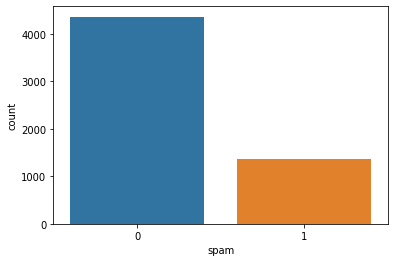

In [19]:
sns.countplot(email_df['spam'], label="Ham vs Spam Count")
## 0 is for ham and 1 is for spam

# 4. Text Preprocessing

In [23]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

def preprocessing_message(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()                   # to convert in the lower
    review = review.split()                   # to convert string into list by words
    ps = PorterStemmer()
    # l = WordNetLemmatizer()
    # removing of stop words and stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    return review


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/himesh27/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Applying Text Processing on the Data

In [24]:
cleaned_text = email_df['text'].apply(preprocessing_message)
cleaned_text

0       subject natur irresist corpor ident lt realli ...
1       subject stock trade gunsling fanni merril muzo...
2       subject unbeliev new home made easi im want sh...
3       subject color print special request addit info...
4       subject money get softwar cd softwar compat gr...
                              ...                        
5723    subject research develop charg gpg forward shi...
5724    subject receipt visit jim thank invit visit ls...
5725    subject enron case studi updat wow day super t...
5726    subject interest david pleas call shirley cren...
5727    subject news aurora updat aurora version faste...
Name: text, Length: 5728, dtype: object

### Make the bag of words with CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(cleaned_text).toarray()
y = email_df.iloc[:, 1].values
print(X.shape)
print(y.shape)

(5728, 25607)
(5728,)


In [31]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## To visualize vectorized data with the Column names

In [32]:
## Convert Vectorized data into a DataFrame
df = pd.DataFrame(X,columns=cv.get_feature_names())
df

,aa,aaa,aaaenerfax,aadedeji,aagraw,aal,aaldou,aaliyah,aall,aanalysi,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into Train and Test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 25607)
(1146, 25607)
(4582,)
(1146,)


# 5. Training the model

In [33]:
# Fitting the classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# 6. Evaluation of the Model

### Predicting the X_test

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

### Confusion Matrix

In [36]:
# Creating confusion matrix for the model
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[875,  10],
       [ 35, 226]])

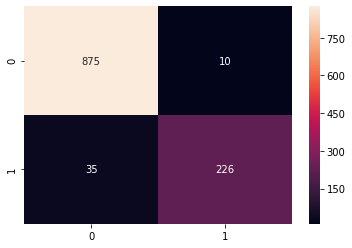

In [61]:
ax = sns.heatmap(cm, annot=True,fmt='g') # annpt=>to show the value , frmt='g' -> to ignore scientific notations 
ax.set_ylim([2,0]) # to set annots in center

plt.sca(ax)

### Accuracy of the Model

In [64]:
TN = cm[0,0]
TP = cm[1,1]
acc = ((TP+TN)/cm.sum())*100
print("Accuracy on the test data : %.2f"%(acc))

Accuracy on the test data : 96.07


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       885
           1       0.96      0.87      0.91       261

    accuracy                           0.96      1146
   macro avg       0.96      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146



## Try by giving manual strings

In [67]:
s = input("Enter to Check if it is spam or not : ")
my = cv.transform([s]).toarray()
result = classifier.predict(my)
print("\nIt will be considered as a spam" if result[0]==1 else "Not a spam, Go ahead.")

Enter to Check if it is spam or not : You have won the lottery of 23000 

It will be considered as a spam


In [68]:
s = input("Enter to Check if it is spam or not : ")
my = cv.transform([s]).toarray()
result = classifier.predict(my)
print("\nIt will be considered as a spam" if result[0]==1 else "Not a spam, Go ahead.")

Enter to Check if it is spam or not : This is to inform you that...
Not a spam, Go ahead.
